- Splitter 
- Hyper-Parameter optimizers
- Model Validation: cross validations

# Cross-Validation Techniques Overview

| **Category**                      | **Technique**                       | **Description**                                     |
|------------------------------------|-------------------------------------|-----------------------------------------------------|
| **Custom Splitters**               | `train_test_split`                  | Split arrays or matrices into random train and test subsets. |
| **K-Fold Cross-Validation**        | `KFold`                             | K-Fold cross-validator.                            |
|                                    | `RepeatedKFold`                     | Repeated K-Fold cross-validator.                   |
|                                    | `StratifiedKFold`                   | Stratified K-Fold cross-validator.                 |
|                                    | `RepeatedStratifiedKFold`           | Repeated Stratified K-Fold cross-validator.         |
| **Leave-One-Out Cross-Validation** | `LeaveOneOut`                       | Leave-One-Out cross-validator.                     |
|                                    | `LeavePOut`                         | Leave-P-Out cross-validator.                       |
| **Group-based Cross-Validation**  | `GroupKFold`                        | K-fold iterator variant with non-overlapping groups. |
|                                    | `StratifiedGroupKFold`              | Stratified K-Fold iterator variant with non-overlapping groups. |
|                                    | `LeaveOneGroupOut`                  | Leave One Group Out cross-validator.               |
|                                    | `LeavePGroupsOut`                   | Leave P Group(s) Out cross-validator.              |
| **Shuffle-Based Cross-Validation** | `ShuffleSplit`                      | Random permutation cross-validator.                |
|                                    |`StratifiedShuffleSplit` | Stratified ShuffleSplit cross-validator.           |
|                                    | `GroupShuffleSplit`                 | Shuffle-Group(s)-Out cross-validation iterator.    |
| **Time Series Cross-Validation**   | `TimeSeriesSplit`                   | Time Series cross-validator.                       |

---

*This table summarizes different cross-validation techniques, categorized by their method type, to help decide which one suits your model validation needs.*


### Custom Splitter

In [ ]:
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    'Input_data_df',
    'target_data_df',
    test_size=0.2,  # Fraction of the data to be used for testing (0.2 means 20% for testing)
    train_size=None,  # Fraction of the data to be used for training (if None, it is set to complement of test_size)
    random_state=None,  # Controls randomness for reproducibility. Use an integer to get the same split every time
    shuffle=True,  # Whether to shuffle the data before splitting. Default is True (randomize order)
    stratify=None  # If set to an array (like the target variable y), splits will be made in a stratified fashion
)

### K-fold CV

In [ ]:
'''
K-Fold Cross-Validation: The data is split into k equal folds. Each fold serves as a test set once, while
                        the remaining k-1 folds are used for training. This process is repeated k times.   [Train size,Test size: k-1,1]
'''
import sklearn.model_selection

# The first (n_samples % n_splits) folds have one extra sample, while the remaining folds have equal sizes
kfold_cv = sklearn.model_selection.KFold(
    n_splits=5,        # Number of splits (folds). Must be at least 2. Default is 5.
    shuffle=False,     # Whether to shuffle the data before splitting. Default is False.
    random_state=None  # Controls randomness when shuffle=True. Default is None (no reproducibility).
)

repeatedkfold_cv = sklearn.model_selection.RepeatedKFold(
    n_splits=5,  # Number of splits (folds). Must be at least 2. Default is 5.
    n_repeats=10,  # Number of times to repeat the cross-validation. Default is 10.
    random_state=None  # Controls randomness of each repeated cross-validation instance. Default is None.
)

# Stratified ensures each fold has the same class distribution, useful for imbalanced classification problems.
stratifiedkfold_cv = sklearn.model_selection.StratifiedKFold(
    n_splits=5,         # Number of splits (folds). Must be at least 2. Default is 5.
    shuffle=False,      # Whether to shuffle each class's samples before splitting into batches. Default is False.
    random_state=None   # Controls the randomness of each fold when shuffle is True. Default is None.
)

repeatedstratifiedkfold_cv=sklearn.model_selection.RepeatedStratifiedKFold(
    n_splits=5,  # Number of splits (folds). Must be at least 2. Default is 5.
    n_repeats=10,  # Number of times to repeat the cross-validation. Default is 10.
    random_state=None  # Controls randomness of each repeated cross-validation instance. Default is None.
)


### Leave-One-Out CV

In [ ]:
"""
LeavePOut CV: In each iteration, p samples are left out for testing, and the model is trained on the remaining n - p samples.
              This process is repeated for all possible combinations of p samples being left out, resulting in multiple train/test splits.
"""
import sklearn.model_selection

leaveoneout_technique=sklearn.model_selection.LeaveOneOut()     # LeaveOneOut() is equivalent to KFold(n_splits=n) and LeavePOut(p=1).
leavepout_technique=sklearn.model_selection.LeavePOut()

### Group-based CV

In [ ]:
'''
GroupKFold is a cross-validation method that ensures all data from a group stays together in either the training or test set.
It's useful when you have multiple records for the same entity, like measurements from the same person.
This prevents data leakage and ensures realistic model validation
'''

import sklearn.model_selection

groupkfold_cv=sklearn.model_selection.GroupKFold(n_splits='5')

stratifiedgroupkfold_cv=sklearn.model_selection.StratifiedGroupKFold(
     n_splits=5,         # Number of splits (folds). Must be at least 2. Default is 5.
     shuffle=False,      # Whether to shuffle each class's samples before splitting into batches. Default is False.
     random_state=None   # Controls the randomness of each fold when shuffle is True. Default is None.
)

leaveonegroupout_cv=sklearn.model_selection.LeaveOneGroupOut()

leavepgroupsout_cv = sklearn.model_selection.LeavePGroupsOut(
     n_groups=2,  # Number of groups (p) to leave out in the test split; For ex: if n_groups=2, two distinct groups will be left out for testing in each split.
)


### Shuffle Split

In [ ]:
"""
K-Fold Cross-Validation splits the data into k fixed folds and rotates the test set sequentially without shuffling between folds.

ShuffleSplit randomly shuffles the data before each split, creating completely random and
independent splits every time (not necessarily sequential).
"""

import sklearn.model_selection

shuffle_split=sklearn.model_selection.ShuffleSplit(
     n_splits=5,         # Number of splits (folds). Must be at least 2. Default is 5.
     test_size=0.2,  # Fraction of the data to be used for testing (0.2 means 20% for testing)
     train_size=None,  # Fraction of the data to be used for training (if None, it is set to complement of test_size)
     random_state=None,  # Controls randomness for reproducibility. Use an integer to get the same split every time
)
stratifiedshufflesplit_cv=sklearn.model_selection.StratifiedShuffleSplit(
     n_splits=5,         # Number of splits (folds). Must be at least 2. Default is 5.
     test_size=0.2,  # Fraction of the data to be used for testing (0.2 means 20% for testing)
     train_size=None,  # Fraction of the data to be used for training (if None, it is set to complement of test_size)
     random_state=None,  # Controls randomness for reproducibility. Use an integer to get the same split every time
)
groupshufflesplit_cv=sklearn.model_selection.GroupShuffleSplit(
     n_splits=5,         # Number of splits (folds). Must be at least 2. Default is 5.
     test_size=0.2,  # Fraction of the data to be used for testing (0.2 means 20% for testing)
     train_size=None,  # Fraction of the data to be used for training (if None, it is set to complement of test_size)
     random_state=None,  # Controls randomness for reproducibility. Use an integer to get the same split every time
)

### Hyper-parameter Optimizers
<table>
  <tr>
    <th><font size="3">Optimizer</font></th>
    <th><font size="3">Description</font></th>
  </tr>
  <tr>
    <td><font size="3">GridSearchCV</font></td>
    <td><font size="3">Exhaustively searches all possible hyperparameter combinations, evaluating each one to find the best configuration.</font></td>
  </tr>
  <tr>
    <td><font size="3">HalvingGridSearchCV</font></td>
    <td><font size="3">Efficiently tunes hyperparameters by starting with many combinations using fewer data points, and progressively allocating more to better-performing ones while discarding weaker ones.</font></td>
  </tr>
  <tr>
    <td><font size="3">RandomizedSearchCV</font></td>
    <td><font size="3">Samples a fixed number of hyperparameter combinations randomly, often faster for large search spaces compared to GridSearchCV.</font></td>
  </tr>
  <tr>
    <td><font size="3">HalvingRandomSearchCV</font></td>
    <td><font size="3">Efficiently tunes hyperparameters by randomly sampling and progressively allocating more resources to better-performing combinations while discarding weaker ones.</font></td>
  </tr>
  <tr>
    <td><font size="3">ParameterGrid</font></td>
    <td><font size="3">ParameterGrid is a container for parameter values, while GridSearchCV tests all combinations of those values to find the best hyperparameters.</font></td>
  </tr>
  <tr>
    <td><font size="3">ParameterSampler</font></td>
    <td><font size="3">ParameterSampler randomly samples parameter combinations from distributions, while RandomizedSearchCV evaluates these samples to find the best model.</font></td>
  </tr>
</table>


#### GridSearchCV

In [ ]:
import sklearn.model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# GridSearchCV Setup
gridsearchcv_hpt = sklearn.model_selection.GridSearchCV(
    estimator=None,  # The model to be tuned
    param_grid=None,  # Hyperparameter grid
    scoring='accuracy',  # Scoring method, can be a string like 'accuracy' or a custom scorer function
    cv=5,  # Number of folds in cross-validation (or a custom cross-validator object)
    verbose=1,  # Controls the verbosity of the output (higher numbers give more info)


    n_jobs=-1,  # Number of CPU cores to use (-1 uses all available cores)
    refit=True,  # Refits the best estimator on the whole dataset after searching
    pre_dispatch="2*n_jobs",  # Number of jobs to run in parallel before dispatching
    error_score='raise',  # How errors are handled (default is 'raise' for throwing errors)
    return_train_score=True  # Whether to include training scores in the results
)

gridsearchcv_hpt.best_score_
gridsearchcv_hpt.best_params_
gridsearchcv_hpt.best_estimator_
gridsearchcv_hpt.best_index_
gridsearchcv_hpt.cv_results_


results = gridsearchcv_hpt.cv_results_               #Assuming gridsearchcv_hpt is already fitted  & get results from GridSearchCV

df = pd.DataFrame(results)                           # Create a DataFrame to make the results more readable
hyperparameters = pd.json_normalize(df['params'])    # 'params' column contains the dictionary of all pairs combination
df = pd.concat([df, hyperparameters], axis=1)        # Concatenate the extracted hyperparameters with the DataFrame

# Display the most important columns
df_summary = df[['hpt_1', 'hpt_2', 'hpt_2','.....','mean_test_score', 'std_test_score', 'mean_fit_time', 'std_fit_time']]
df_sorted = df_summary.sort_values(by=['mean_test_score', 'mean_fit_time'], ascending=[False, True])  # Sort by performance and training time
df_sorted




#### Example_gridsearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.svm import SVC


# Example data
iris = load_iris()
X, y = iris.data, iris.target

# Define a simple SVC model
model = SVC()

# Define a small hyperparameter grid to search
search_grid = {
    'C': [0.1, 1, 10],               # Regularization parameter for SVC
    'gamma': [0.01, 0.1, 1],         # Kernel coefficient for 'rbf' kernel
}

# Set up GridSearchCV
gridsearchcv_hpt = GridSearchCV(
    estimator=model,
    param_grid=search_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    refit=True,
    pre_dispatch="2*n_jobs",
    error_score='raise',
    return_train_score=True
)

# Fit the model
gridsearchcv_hpt.fit(X, y)

# Retrieve results
print(f"Best Score: {gridsearchcv_hpt.best_score_}")
print(f"Best Parameters: {gridsearchcv_hpt.best_params_}")
print(f"Best Estimator: {gridsearchcv_hpt.best_estimator_}")
print(f"Best Index: {gridsearchcv_hpt.best_index_}")

results = gridsearchcv_hpt.cv_results_               #Assuming gridsearchcv_hpt is already fitted  & get results from GridSearchCV

df = pd.DataFrame(results)                           # Create a DataFrame to make the results more readable
hyperparameters = pd.json_normalize(df['params'])    # 'params' column contains the dictionary of all pairs combination
df = pd.concat([df, hyperparameters], axis=1)        # Concatenate the extracted hyperparameters with the DataFrame

# Display the most important columns
df_summary = df[['C', 'gamma', 'mean_test_score',  'mean_fit_time', 'std_test_score', 'std_fit_time']]
df_sorted = df_summary.sort_values(by=['mean_test_score', 'mean_fit_time'], ascending=[False, True])  # Sort by performance and training time
df_sorted



#### HalvingGridSearchCV

In [ ]:
import sklearn.model_selection
from sklearn.base import BaseEstimator
from sklearn.svm import SVC
from typing import Sequence, Mapping, Literal
import numpy as np
from numpy.random import RandomState

halving_grid_search_cv = sklearn.model_selection.HalvingGridSearchCV(
    estimator=None, 
    param_grid=None,
    cv=5,                    # Cross-validation strategy. Default is 5-fold CV.
    scoring=None,            # Metric to evaluate model performance, e.g., 'accuracy'. Default is the estimator's scoring method.
    factor=3,                # The factor by which resources (e.g., samples) are increased at each iteration.
    resource="n_samples",    # Defines the resource to vary, default is "n_samples".

    max_resources="auto",  # Maximum resource to allocate. Default "auto" uses all available resources.
    min_resources="exhaust",  # Minimum resources for a configuration. "exhaust" uses the smallest possible value.
    aggressive_elimination=False,  # If True, eliminates poor configurations more aggressively.
    refit=True,                    # Whether to refit the best estimator on the entire dataset. Default is True.
    error_score=np.nan,            # Value to assign when an error occurs during fitting. Default is NaN.
    return_train_score=True,       # Whether to include training scores in the results. Default is True.
    random_state=None,             # Seed for reproducibility. Default is None, meaning no fixed seed.
    n_jobs=None,                   # Number of CPU cores to use for parallel processing. Default is None, using 1 core.
    verbose=0                      # Controls the verbosity of output. Default is 0 (silent).
)


# Extract best parameters and results after fitting
halving_grid_search_cv.best_score_
halving_grid_search_cv.best_params_
halving_grid_search_cv.best_estimator_
halving_grid_search_cv.best_index_
halving_grid_search_cv.cv_results_




cv_results=halving_grid_search_cv.cv_results_
results_df = pd.DataFrame(cv_results)

hyperparameters_df = pd.json_normalize(results_df['params'])
results_combined_df = pd.concat([results_df, hyperparameters_df], axis=1)

# Display key columns: hyperparameters, mean test score, std test score, mean fit time, and std fit time
df_summary = results_combined_df[['hpt_1', 'hpt_2', 'hpt_3', 'mean_test_score', 'std_test_score', 'mean_fit_time', 'std_fit_time']]
df_sorted = df_summary.sort_values(by=['mean_test_score', 'mean_fit_time'], ascending=[False, True])
df_sorted



#### Example of HalfGridSearchCV

In [ ]:
import sklearn.model_selection
from sklearn.experimental import enable_halving_search_cv
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import pandas as pd
import numpy as np

# Load toy dataset (Iris dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Define a simple SVC model
model = SVC()

# Define a small hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],               # Regularization parameter for SVC
    'gamma': [0.01, 0.1, 1],         # Kernel coefficient for 'rbf' kernel
}

# Set up HalvingGridSearchCV
halving_grid_search_cv = sklearn.model_selection.HalvingGridSearchCV(
    estimator=model, 
    param_grid=param_grid,
    factor=2,                        # Increase resources by a factor of 2
    resource="n_samples",            # Vary resources based on the number of samples
    max_resources="auto",            # Use all available resources
    min_resources="exhaust",         # Start with the smallest resources
    cv=3,                            # 3-fold cross-validation
    verbose=0,                       # Print progress
    refit=True,                      # Refit the best model on the whole dataset
    return_train_score=True          # Include training scores in results
)

# Fit the model with the data
halving_grid_search_cv.fit(X, y)

# Retrieve results
print(f"Best Score: {halving_grid_search_cv.best_score_}")
print(f"Best Parameters: {halving_grid_search_cv.best_params_}")
print(f"Best Estimator: {halving_grid_search_cv.best_estimator_}")

cv_results=halving_grid_search_cv.cv_results_
results_df = pd.DataFrame(cv_results)

hyperparameters_df = pd.json_normalize(results_df['params'])
results_combined_df = pd.concat([results_df, hyperparameters_df], axis=1)

# Display key columns: hyperparameters, mean test score, std test score, mean fit time, and std fit time
df_summary = results_combined_df[['C', 'gamma', 'mean_test_score', 'std_test_score', 'mean_fit_time', 'std_fit_time']]
df_sorted = df_summary.sort_values(by=['mean_test_score', 'mean_fit_time'], ascending=[False, True])
df_sorted


#### RandomizedSearchCV

In [ ]:
import sklearn.model_selection
from sklearn.base import BaseEstimator
from typing import Sequence, Mapping
import numpy as np

randomizedsearchcv_hpt = sklearn.model_selection.RandomizedSearchCV(
    estimator=None,             # The model to be tuned. Default is None, must be set to a specific estimator like RandomForestClassifier.
    param_distributions=None,   # The distribution of hyperparameters to sample from. Default is None, meaning no search is done.
    n_iter=10,                  # The number of iterations (samples) for random search. Default is 10.
    scoring=None,               # A string (e.g., 'accuracy') or callable scoring function. Default is None, which means using the estimator's default scoring method.
    n_jobs=None,                # Number of CPU cores to use for parallel processing. Default is None, which means using a single core.
    refit=True,                 # Whether to refit the best model on the entire dataset after search. Default is True.
    cv=None,                    # Cross-validation splitting strategy. Default is None, which uses 5-fold cross-validation.
    verbose=0,                  # Controls the verbosity of the output. Default is 0, which means no output.
    pre_dispatch="2*n_jobs",    # Number of jobs to run in parallel before dispatching. Default is "2*n_jobs", which means two times the number of jobs.
    random_state=None,          # The seed for random number generation to ensure reproducibility. Default is None (no fixed seed).
    error_score=np.nan,         # The value to assign when an error occurs during fitting. Default is NaN.
    return_train_score=False    # Whether to include training scores in the results. Default is False.
)

randomizedsearchcv_hpt.best_score_
randomizedsearchcv_hpt.best_params_
randomizedsearchcv_hpt.best_estimator_
randomizedsearchcv_hpt.best_index_
randomizedsearchcv_hpt.cv_results_


results = randomizedsearchcv_hpt.cv_results_               #Assuming gridsearchcv_hpt is already fitted  & get results from GridSearchCV

df = pd.DataFrame(results)                           # Create a DataFrame to make the results more readable
hyperparameters = pd.json_normalize(df['params'])    # 'params' column contains the dictionary of all pairs combination
df = pd.concat([df, hyperparameters], axis=1)        # Concatenate the extracted hyperparameters with the DataFrame

# Display the most important columns
df_summary = df[['hpt_1', 'hpt_2', 'hpt_2','.....','mean_test_score', 'std_test_score', 'mean_fit_time', 'std_fit_time']]
df_sorted = df_summary.sort_values(by=['mean_test_score', 'mean_fit_time'], ascending=[False, True])  # Sort by performance and training time
df_sorted



#### Example of randomizedsearchcv_hpt

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import pandas as pd
import sklearn.model_selection

# Example data
iris = load_iris()
X, y = iris.data, iris.target

# Define SVC model
model = SVC()

# Define parameter distributions for SVC
param_distributions = {
    'C': [0.1, 1, 10],          # Regularization parameter for SVC
    'gamma': [0.01, 0.1, 1],    # Kernel coefficient for 'rbf' kernel
    'kernel': ['linear', 'rbf'],# Kernel type: linear or radial basis function (rbf)
}

# Set up RandomizedSearchCV
randomizedsearchcv_hpt = sklearn.model_selection.RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,  # Using param_distributions here
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    refit=True,
    pre_dispatch="2*n_jobs",
    error_score='raise',
    return_train_score=True,
    n_iter=10  # Number of iterations for random sampling
)

# Fit the model
randomizedsearchcv_hpt.fit(X, y)

# Retrieve results
print(f"Best Score: {randomizedsearchcv_hpt.best_score_}")
print(f"Best Parameters: {randomizedsearchcv_hpt.best_params_}")
print(f"Best Estimator: {randomizedsearchcv_hpt.best_estimator_}")
print(f"Best Index: {randomizedsearchcv_hpt.best_index_}")

# Retrieve and format the results
results = randomizedsearchcv_hpt.cv_results_  # Get results from RandomizedSearchCV

# Create a DataFrame for readability
df = pd.DataFrame(results)

# Normalize the 'params' column to separate hyperparameters
hyperparameters = pd.json_normalize(df['params'])

# Concatenate the hyperparameters with the results DataFrame
df = pd.concat([df, hyperparameters], axis=1)

# Display important columns and sort by performance
df_summary = df[['C', 'gamma', 'kernel', 'mean_test_score', 'mean_fit_time', 'std_test_score', 'std_fit_time']]
df_sorted = df_summary.sort_values(by=['mean_test_score', 'mean_fit_time'], ascending=[False, True])

# Display sorted results
df_sorted


### HalvingRandomSearchCV

In [ ]:
import sklearn.model_selection

Halving_randomsearchCV_hpt=sklearn.model_selection.HalvingRandomSearchCV(
    estimator=None, 
    param_grid=None,
    cv=5,                    # Cross-validation strategy. Default is 5-fold CV.
    scoring=None,            # Metric to evaluate model performance, e.g., 'accuracy'. Default is the estimator's scoring method.
    factor=3,                # The factor by which resources (e.g., samples) are increased at each iteration.
    resource="n_samples",    # Defines the resource to vary, default is "n_samples".

    max_resources="auto",          # Maximum resource to allocate. Default "auto" uses all available resources.
    min_resources="exhaust",       # Minimum resources for a configuration. "exhaust" uses the smallest possible value.
    aggressive_elimination=False,  # If True, eliminates poor configurations more aggressively.
    refit=True,                    # Whether to refit the best estimator on the entire dataset. Default is True.
    error_score=np.nan,            # Value to assign when an error occurs during fitting. Default is NaN.
    return_train_score=True,       # Whether to include training scores in the results. Default is True.
    random_state=None,             # Seed for reproducibility. Default is None, meaning no fixed seed.
    n_jobs=None,                   # Number of CPU cores to use for parallel processing. Default is None, using 1 core.
    verbose=0                      # Controls the verbosity of output. Default is 0 (silent).
)


# Extract best parameters and results after fitting
Halving_randomsearchCV_hpt.best_score_
Halving_randomsearchCV_hpt.best_params_
Halving_randomsearchCV_hpt.best_estimator_
Halving_randomsearchCV_hpt.best_index_
Halving_randomsearchCV_hpt.cv_results_




cv_results=Halving_randomsearchCV_hpt.cv_results_
results_df = pd.DataFrame(cv_results)

hyperparameters_df = pd.json_normalize(results_df['params'])
results_combined_df = pd.concat([results_df, hyperparameters_df], axis=1)

# Display key columns: hyperparameters, mean test score, std test score, mean fit time, and std fit time
df_summary = results_combined_df[['hpt_1', 'hpt_2', 'hpt_3', 'mean_test_score', 'std_test_score', 'mean_fit_time', 'std_fit_time']]
df_sorted = df_summary.sort_values(by=['mean_test_score', 'mean_fit_time'], ascending=[False, True])
df_sorted


### Example of HalvingRandomSearchCV

In [ ]:
import sklearn.model_selection
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define the SVC model
model = SVC()

# Define a small hyperparameter grid to search
param_distributions = {
    'C': [0.1, 1, 10],                # Regularization parameter for SVC
    'gamma': [0.01, 0.1, 1],          # Kernel coefficient for 'rbf' kernel
}

# Set up HalvingRandomSearchCV
halving_randomsearch_cv = sklearn.model_selection.HalvingRandomSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    factor=2,                         # Increase resources by a factor of 2
    resource="n_samples",             # Vary resources based on the number of samples
    max_resources="auto",             # Use all available resources
    min_resources="smallest",          # Start with the smallest resources
    cv=3,                             # 3-fold cross-validation
    verbose=0,                        # Print progress
    refit=True,                       # Refit the best model on the whole dataset
    return_train_score=True           # Include training scores in results
)

# Fit the model with the data
halving_randomsearch_cv.fit(X, y)

# Retrieve results
print(f"Best Score: {halving_randomsearch_cv.best_score_}")
print(f"Best Parameters: {halving_randomsearch_cv.best_params_}")
print(f"Best Estimator: {halving_randomsearch_cv.best_estimator_}")

# Display the results in a DataFrame
cv_results = halving_randomsearch_cv.cv_results_
results_df = pd.DataFrame(cv_results)

# Extract hyperparameters from the 'params' column
hyperparameters_df = pd.json_normalize(results_df['params'])

# Combine the results with hyperparameters
results_combined_df = pd.concat([results_df, hyperparameters_df], axis=1)

# Display the most important columns: hyperparameters, mean test score, std test score, mean fit time, and std fit time
df_summary = results_combined_df[['C', 'gamma', 'mean_test_score', 'std_test_score', 'mean_fit_time', 'std_fit_time']]
df_sorted = df_summary.sort_values(by=['mean_test_score', 'mean_fit_time'], ascending=[False, True])

# Display the sorted results
print(df_sorted)


| **Concept**            | **Description**                                                                                                               |
|------------------------|-------------------------------------------------------------------------------------------------------------------------------|
| **Learning Curve**      | Shows how performance changes with increasing training data, helping identify overfitting or underfitting.                   |
| **Visualization Tool**  | `LearningCurveDisplay`                                                                                                        |
| **Validation Curve**    | Shows how performance changes with different hyperparameter values, helping find the optimal setting.                         |
| **Permutation Test Score** | Helps check if your model's performance is better than random chance. It shuffles the labels in the data, retrains the model, and compares the results with the original performance. A significantly higher accuracy than random scores means the performance is likely meaningful. |


### Learning Curve.

In [ ]:
import sklearn.model_selection

train_size_abs, train_scores, test_scores = sklearn.model_selection.learning_curve(
    tree,                                # Estimator (model) to use for fitting the data
    X,                                   # Input dataframe
    y,                                   # Target dataframe
    train_sizes=[0.3, 0.6, 0.9],         # Training set sizes to evaluate (30%, 60%, and 90% of the data)
    cv=None,                             # Cross-validation splitting strategy (None means no cross-validation, uses 5-fold by default)
    scoring=None,                        # Evaluation metric (None means the model's default score will be used, e.g., accuracy for classification)
    exploit_incremental_learning=False,  # If True, will use partial fitting if the model supports it (useful for large datasets)
    n_jobs=None,                         # Number of CPU cores to use for parallel computation (None means 1, -1 means all available cores)
    pre_dispatch="all",                  # Number of jobs to pre-dispatch for parallel execution (controls parallelism)
    verbose=0,                           # Verbosity level, 0 means no output, higher numbers give more details about the process
    shuffle=False,                       # If True, the data will be shuffled before splitting into cross-validation folds
    random_state=None,                   # Random state for reproducibility of the results (if None, it’s randomly initialized)
    error_score=np.nan,                  # Value to assign when an error occurs during fitting (e.g., np.nan, or 'raise' to raise an error)
    return_times=False,                  # If True, will also return the time taken for each fitting operation
    fit_params=None                      # Additional parameters to pass to the fit method of the estimator
)

display = sklearn.model_selection.LearningCurveDisplay(
    train_sizes=train_size_abs,  # The absolute sizes of the training set for each evaluation
    train_scores=train_scores,  # The training scores (e.g., accuracy) for each training set size
    test_scores=test_scores,  # The test scores (e.g., accuracy) for each training set size
    score_name="Score",  # The name of the metric being plotted (e.g., "Accuracy", "Score")
)

# Plot the learning curve
display.plot()  # This generates the plot of training and test scores across the training set sizes


#### Example  for learning curve.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Initialize the DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=100)

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(tree, X, y)

# Create the LearningCurveDisplay object
display = LearningCurveDisplay(
    train_sizes=train_sizes,
    train_scores=train_scores,
    test_scores=test_scores,
    score_name="Accuracy"  # Better to specify the score type
)

# Plot with gridlines and labels for clarity
display.plot()
plt.grid(True)  # Add gridlines to make it easier to see the values
plt.title("Learning Curve (Accuracy vs Training Set Size)")  # Add a title
plt.xlabel("Training Set Size")  # Label for the x-axis
plt.ylabel("Accuracy Score")  # Label for the y-axis
plt.show()  # Show the plot


### Validation Curve

In [ ]:
'''
A validation curve evaluates a model's performance by testing different values of a hyperparameter, such as C,
to see how it affects training and test accuracy.
It helps identify the best hyperparameter value by showing whether the model is overfitting, underfitting, or generalizing well.
'''
train_scores, test_scores = sklearn.model_selection.validation_curve(
    estimator=SVC(),  # The model to evaluate (Support Vector Classifier)
    X=X_train,  # The training feature set
    y=y_train,  # The target labels for training data
    param_name='C',  # The hyperparameter name ('C')
    param_range=[0.1, 1, 10, 100],  # The range of values for 'C' to test
    cv=5,  # The number of cross-validation folds (5-fold cross-validation)
    scoring='accuracy',  # The scoring metric to evaluate (accuracy)
    n_jobs=-1,  # Use all available CPU cores for parallel processing
    verbose=1,  # Display progress information
    error_score='raise'  # Raise an error if fitting fails (or can be a numeric value)
)


### Example for validation curve

The average train accuracy is 0.81
The average test accuracy is 0.81


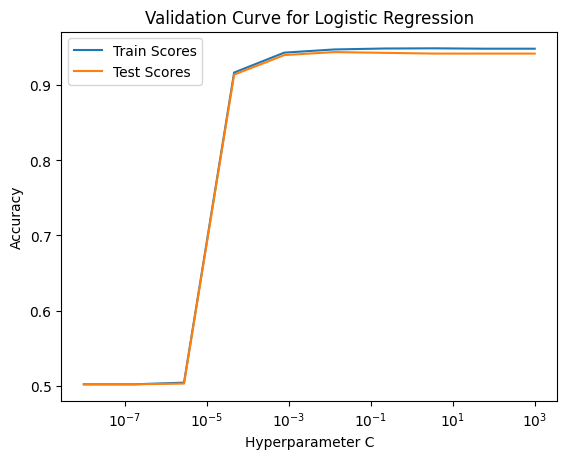

In [52]:
from sklearn.datasets import make_classification  # Importing to generate a synthetic classification dataset
from sklearn.model_selection import validation_curve  # Importing the validation_curve function to evaluate hyperparameters
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression classifier
import numpy as np  # For creating a range of values for hyperparameters
import matplotlib.pyplot as plt  # For plotting

# Generate a synthetic classification dataset with 1,000 samples and default random state
X, y = make_classification(n_samples=1_000, random_state=0)

# Initialize the LogisticRegression model
logistic_regression = LogisticRegression()

# Define the hyperparameter 'C' and a range of values (logarithmic scale from 1e-8 to 1e3)
param_name, param_range = "C", np.logspace(-8, 3, 10)

# Run validation curve to evaluate model performance across different values of 'C'
train_scores, test_scores = validation_curve(
    logistic_regression,  # The classifier to evaluate
    X,  # The input features
    y,  # The target labels
    param_name=param_name,  # The hyperparameter to tune ('C')
    param_range=param_range  # The range of values for 'C' to evaluate
)

# Print the average accuracy on the training set across all values of 'C'
print(f"The average train accuracy is {train_scores.mean():.2f}")

# Print the average accuracy on the test set across all values of 'C'
print(f"The average test accuracy is {test_scores.mean():.2f}")

# Plotting the training and test scores across different values of 'C'
plt.plot(param_range, train_scores.mean(axis=1), label="Train Scores")
plt.plot(param_range, test_scores.mean(axis=1), label="Test Scores")
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Hyperparameter C')
plt.ylabel('Accuracy')
plt.title('Validation Curve for Logistic Regression')
plt.legend()
plt.show()


### Permutation_test_Score

In [ ]:
from sklearn.model_selection import permutation_test_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Example usage of permutation_test_score
permutation_test_score = sklearn.model_selection.permutation_test_score(
    estimator=SVC(),     # The estimator to evaluate (Support Vector Classifier in this case)
    X=X,                 # Input dataframe
    y=y,                 # Target dataframe
    groups=None,         # Group labels for group cross-validation (default is None)
    cv=5,                # Cross-validation splitting strategy (default is 5-fold cross-validation)
    n_permutations=100,  # Number of times to permute the data (default is 100)
    n_jobs=None,         # Number of jobs to run in parallel (default is None, i.e., no parallelization)
    random_state=0,      # Random seed for reproducibility (default is 0)
    verbose=0,           # Verbosity level (default is 0, no output)
    scoring=None,        # Scoring metric (default is None, uses estimator's default scoring)
    fit_params=None      # Parameters passed to the fit method (default is None)
)


### Permutation_test_score example.

In [53]:
from sklearn.datasets import make_classification  # Importing dataset for classification
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression classifier
from sklearn.model_selection import permutation_test_score  # Importing permutation test function

# Generate a synthetic classification dataset
X, y = make_classification(random_state=0)

# Initialize the Logistic Regression model
estimator = LogisticRegression()

# Perform the permutation test to evaluate the model's significance
score, permutation_scores, pvalue = permutation_test_score(
    estimator, X, y, random_state=0
)

# Print the original score, mean and standard deviation of permutation scores, and p-value
print(f"Original Score: {score:.3f}")
print(f"Permutation Scores: {permutation_scores.mean():.3f} +/- {permutation_scores.std():.3f}")
print(f"P-value: {pvalue:.3f}")


Original Score: 0.810
Permutation Scores: 0.505 +/- 0.057
P-value: 0.010
